In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
import quandl
from scipy.optimize import minimize
from pandas import Series
from pandas import DataFrame

#### define sample size

In [3]:
s=10000

#### Simulate ϵ with 10000 random draws from a standard normal distribution

In [4]:
epsilon = np.random.standard_normal(s)
epsilon

array([-1.05632604, -1.53330315, -0.48280635, ...,  0.77267953,
        0.26509789, -1.42339401])

### consumption growth has a lognormal distribution: 

## $\ln$$g̃$ =0.02+0.02$ϵ̃$

### Define $g̃$ value

In [7]:
g = []
for i in np.arange(0, s):
    g_val = np.exp(0.02 + 0.02 * epsilon[i])
    g.append(g_val)

In [8]:
G = np.array(g)

In [9]:
G.mean()

1.0203422556445052

### Calculate utility of financial gain or loss $ν̃$ and Calculate the equilibrium values of x for b0 in the range [0, 10], in increments of 0.1, using an iterative procedure known as bisection search

In [10]:
import statistics

In [11]:
def myex(b0,x):
    nu=[]
    global G
    R=x*G;
    n=len(R);
    for i in range(0,n):
        if(R[i]>=1.0303):
            v=R[i]-1.0303;
            nu.append(v)
        else:
            k=2*(R[i]-1.0303);
            nu.append(k)
            
    return 0.99*b0*statistics.mean(nu)+0.99*x-1;
    

In [12]:
def mybisection(b0):
    a=1;
    b=1.1;
    signa=-1; # when x=1, the value is negative;
    signb=1;  # when x=1.1, the value is positive;
    x=(a+b)/2;
    ex=myex(b0,x)
    while(abs(ex)>=0.00001):
        if (ex*signb>0):
            b=x;
        else:
            a=x; 
        x=(a+b)/2;
        ex=myex(b0,x);
    return x

In [13]:
b0=np.arange(0,10,0.1)

In [14]:
x=[]
for i in np.arange(0,10,0.1):
    x.append(mybisection(i))

In [15]:
X = np.array(x)

### Use x to calculate the price-dividend ratio for the market portfolio:

In [16]:
price_dividend_ratio=1/(X-1)

Text(0, 0.5, 'price_dividend_ratio')

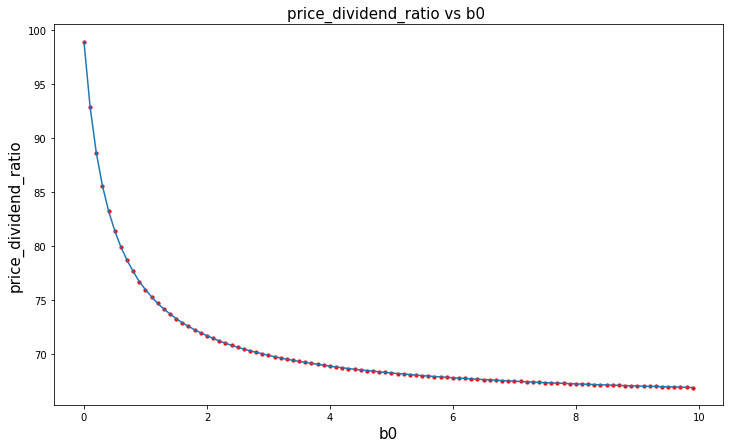

In [17]:
plt.figure(figsize=(12,7))
plt.plot(b0, price_dividend_ratio)
plt.scatter(b0, price_dividend_ratio, s=10, c='r')
plt.title('price_dividend_ratio vs b0 ',fontsize=15)
plt.xlabel('b0', fontsize=15)
plt.ylabel('price_dividend_ratio', fontsize=15)

### calculate the expected market return

#expected market return
Rm=[]
for i in np.arange(0,100) :
    R_m=X[i]*G.mean()
    Rm.append(R_m)

In [39]:
Expected_Market_Return=np.array(Rm)

In [41]:
#Calculate equity premium
Equity_Premium = Expected_Market_Return-1.0303

Text(0, 0.5, 'Equity_Premium')

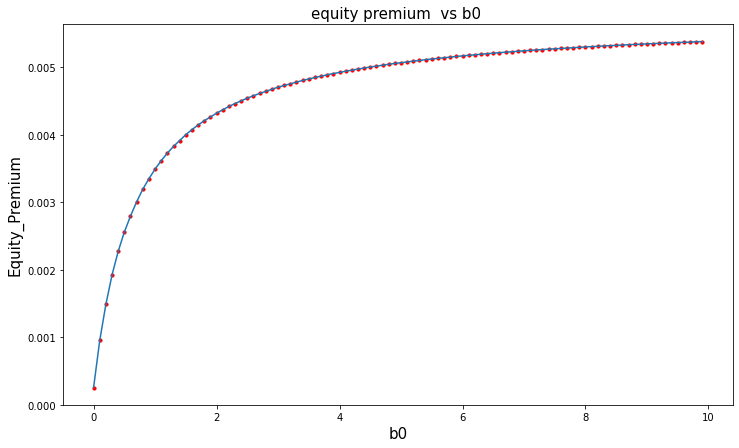

In [43]:
plt.figure(figsize=(12,7))
plt.plot(b0, Equity_Premium)
plt.scatter(b0, Equity_Premium, s=10, c='r')
plt.title('equity premium  vs b0 ',fontsize=15)
plt.xlabel('b0', fontsize=15)
plt.ylabel('Equity_Premium', fontsize=15)

## Briefly explain the economic significance of the investor's utility function for financial gain or loss [i.e., 𝜈(R)], as well as the economic significance of the parameters b0 and 𝜆.:


## Economic Significance:

### Economic Significance of the utility function

#### This utility function is about intertemporal consumption and asset allocation or portfolio choice. And this model incorporates two types of biases. These two are loss aversion and house money effect. The function is under the endowment economy. We could solve for equilibrium price and expected returns numerically. Also, Utility function combines power utility for consumption with prospect theory for utility from recent financial gains or losses

### Economic Significance of b0

#### b0 determines the importance of utility of recent gain or loss. It will rebalance the utility of consumption and the utility of recent gains or losses in financial wealth. So these two utilities will remain comparable in magnitude. Otherwise, the prospect theory term would dominate the conventional constant relative risk aversion term. 

### Economic Significance of lambda

#### λ represents loss aversion. In particular, λ>1, it means that investor’s utility could be more sensitive to recent losses than recent gains in financial wealth. So losses have a disproportionately bigger impact on utility. 

### Economic Significance of the results

#### Equity premium is increasing with b0, and the price-dividend ratio is decreasing with b0, because investor puts more emphasis on utility from recent gains or losses in financial wealth. But using simulated data, the model-based equity premium is much smaller than historical equity premium for  U.S. market.

### In principle, can generate large market risk premium with small coefficient of relative risk aversion, so no equity premium puzzle

### In practice, market risk premium is too small without house money effect